# Evaluation
We have performed 2 trainings: one with ResNet-50 model and one with VGG-16 model. The hyperparameters for both architectures were the same:
```
{
    "n_classes": 130,
    "num_workers": 0,
    "batch_size": 32,
    "lr": 0.001,
    "epochs": 20,
    "max_epoch_stop": 5
}
```
In this notebook the training results will be presented and the final evaluation of the best model will be performed.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
resnet_history = pd.read_pickle('models/resnet50_lr1e-3_bs32.p')
vgg_history = pd.read_pickle('models/vgg16_lr1e-3_bs32.p')

## ResNet-50 results

In [4]:
resnet_history

,train_loss,val_loss,accuracy
0,2.074483,1.593605,0.545385
1,1.606918,1.304521,0.610769
2,1.526289,1.204685,0.655385
3,1.492042,1.133914,0.660769
4,1.476058,1.113377,0.660769
5,1.470588,1.125061,0.657692
6,1.464809,1.086247,0.670385
7,1.454037,1.109064,0.680385
8,1.458630,1.110455,0.681923
9,1.455108,1.095910,0.659231


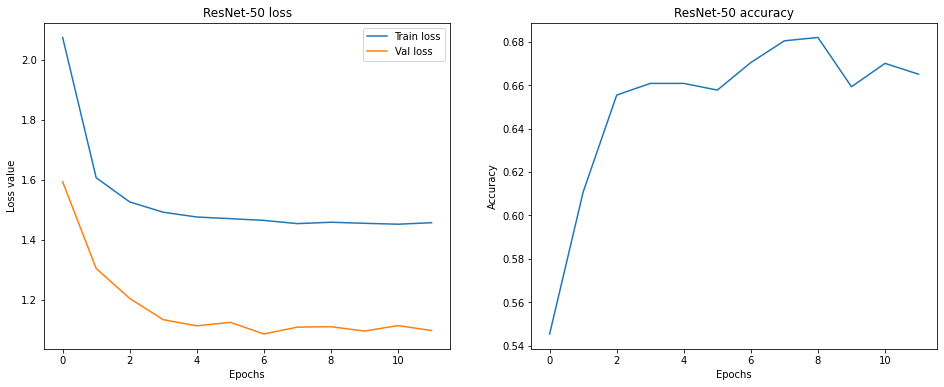

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(resnet_history.index, resnet_history['train_loss'], label='Train loss')
ax[0].plot(resnet_history.index, resnet_history['val_loss'], label='Val loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss value')
ax[0].set_title('ResNet-50 loss')
ax[0].legend()

ax[1].plot(resnet_history.index, resnet_history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('ResNet-50 accuracy')

plt.show()

## VGG-16 results

In [6]:
vgg_history

,train_loss,val_loss,accuracy
0,1.393212,0.870372,0.727692
1,1.228782,0.884662,0.735000
2,1.231195,0.827844,0.739615
3,1.236612,0.847007,0.740385
4,1.245481,0.856536,0.738462
5,1.251084,0.861592,0.725769
6,1.252008,0.856859,0.744615
7,1.255664,0.874102,0.743462


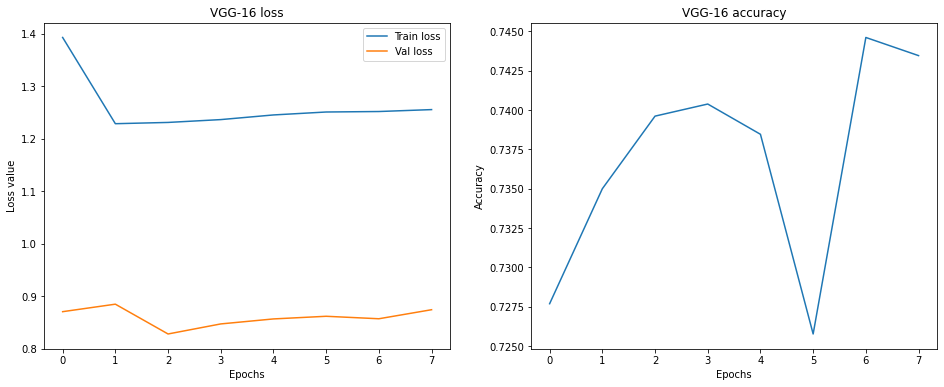

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(vgg_history.index, vgg_history['train_loss'], label='Train loss')
ax[0].plot(vgg_history.index, vgg_history['val_loss'], label='Val loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss value')
ax[0].set_title('VGG-16 loss')
ax[0].legend()

ax[1].plot(vgg_history.index, vgg_history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('VGG-16 accuracy')

plt.show()

As we can see from the plots above the VGG-16 model performs slightly better and will be used for evaluation on test dataset. In both cases the values of training loss dropped significantly at the beginning and then remained around certain value. To prevent overfitting early stopping was applied.

## Final evaluation
To simplify evaluation we have created a script similar to the training one that can be run from the command line. An user needs to pass file with hyperparameters and name of the model as arguments.

In [8]:
%run doggofier/evaluate.py vgg16_lr1e-3_bs32.json vgg16

Evaluation for model: vgg16_lr1e-3_bs32
Loading the dataset...
Dataset loading has been completed.
/mnt/d/Projekty/doggofier/venv/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Evaluation in process...
Evaluation has been completed.
Loss: 0.8857766720579892	Accuracy: 0.7330769230769231


The VGG-16 model achieved over 73% accuracy on test dataset. In the table below there are benchmarks compared with our value.

| Model         | Backbone      | Batch size  | Epochs | Accuracy |
|:-------------:|:-------------:|:-----------:|:------:|:--------:|
| WS-DAN        | Inception v3  | 12          | 80     | 86.4%    |
| TBMSL-Net     | Resnet50      | 6           | 200    | 83.7%    |
| PMG           | Resnet50      | 16          | 200    | 83.5%    |
| Inception v3  | N/A           | 64          | 200    | 77.7%    |
| VGG-16        | N/A           | 32          | 8      | 73.3%    |